In [1]:
import os
import pandas as pd

In [10]:
cctv_csvPath =  '/content/drive/MyDrive/파이썬/DS_EX/data/01. CCTV_in_Seoul.csv'

In [11]:
pop_xlsPath =  '/content/drive/MyDrive/파이썬/DS_EX/data/01. population_in_Seoul.xls' 

In [9]:
#csv 파일 불러오기
CCTV_Seoul = pd.read_csv(cctv_csvPath)

In [12]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [13]:
CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,1624,1368,218,112,398
21,은평구,1873,1138,224,278,468
22,종로구,1002,464,314,211,630
23,중구,671,413,190,72,348
24,중랑구,660,509,121,177,109


In [14]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [15]:
#CCTV_Seoul.columns = ['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년']
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [16]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)

In [17]:
CCTV_Seoul.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [18]:
# excel파일 불러오기
pop_Seoul = pd.read_excel(pop_xlsPath)

In [19]:
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [20]:
# excel파일 불러오기 - 세부적인 불러오기 옵션 설정
pop_Seoul = pd.read_excel(pop_xlsPath, header=2, usecols='B,D,G,J,N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [21]:
pop_Seoul.columns

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')

In [22]:
pop_Seoul.columns = ['구별', '인구수', '한국인', '외국인', '고령자']

CCTV 데이터 확인하기 (EDA)

In [23]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [24]:
CCTV_Seoul.sort_values(by='소계', ascending=True).tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,1624,1368,218,112,398
21,은평구,1873,1138,224,278,468
14,서초구,1930,1406,157,336,398
18,양천구,2034,1843,142,30,467
0,강남구,2780,1292,430,584,932


In [26]:
# 최근증가율
CCTV_Seoul['최근증가율'] = ((CCTV_Seoul['2016년']+CCTV_Seoul['2015년']+CCTV_Seoul['2014년'])/CCTV_Seoul['2013년도 이전']*100)

CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(7)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765
19,영등포구,904,495,214,195,373,157.979798
0,강남구,2780,1292,430,584,932,150.619195


인구 데이터 확인하기 (EDA)

In [27]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


In [28]:
# 합계행은 불필요하므로 삭제, index 26행도 불필요하므로 삭제
pop_Seoul.drop([0,26], inplace=True)

In [29]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [32]:
# 행을 삭제했으니 index를 초기화
pop_Seoul.reset_index(drop= True, inplace=True)

In [33]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자
0,종로구,162820.0,153589.0,9231.0,25425.0
1,중구,133240.0,124312.0,8928.0,20764.0
2,용산구,244203.0,229456.0,14747.0,36231.0
3,성동구,311244.0,303380.0,7864.0,39997.0
4,광진구,372164.0,357211.0,14953.0,42214.0
5,동대문구,369496.0,354079.0,15417.0,54173.0
6,중랑구,414503.0,409882.0,4621.0,56774.0
7,성북구,461260.0,449773.0,11487.0,64692.0
8,강북구,330192.0,326686.0,3506.0,54813.0
9,도봉구,348646.0,346629.0,2017.0,51312.0


In [34]:
print(pop_Seoul['구별'].unique())
print(len(pop_Seoul['구별'].unique()))

['종로구' '중구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구' '강북구' '도봉구' '노원구' '은평구'
 '서대문구' '마포구' '양천구' '강서구' '구로구' '금천구' '영등포구' '동작구' '관악구' '서초구' '강남구' '송파구'
 '강동구']
25


In [35]:
pop_Seoul.isna()

,구별,인구수,한국인,외국인,고령자
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [36]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100

In [37]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
1,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
2,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
3,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
4,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [38]:
print(len(pop_Seoul['구별'].unique()))
print(len(CCTV_Seoul['구별'].unique()))

25
25


In [39]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [40]:
data_result

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,573,78,53,174,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,1142,173,246,323,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,674,51,269,354,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,542,57,451,516,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,238,159,42,386,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [41]:
data_result.drop(['2013년도 이전','2014년','2015년','2016년'],axis=1, inplace=True)

In [42]:
data_result

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [43]:
import numpy as np
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [44]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [45]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

Matplotlib 패키지로 그래프 그리기

In [46]:
import matplotlib.pyplot as plt

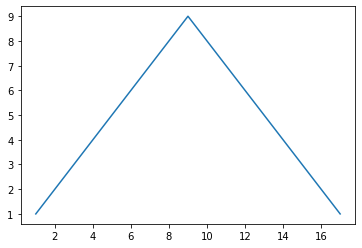

In [51]:
# 빈 캔버스를 초기화한다.
plt.figure()

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1]

# 그래프를 메모리상에서 그리고
plt.plot(x,y)
# 그래프를 출력한다.
plt.show()

In [48]:
# np.arange
# numpy는 데이터타입을 numy.ndarray

for i in range(0,10,1):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [54]:
x = np.arange(1,18,1)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

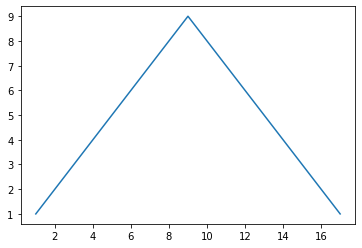

In [55]:
plt.plot(x,y)
# 그래프를 출력한다.
plt.show()

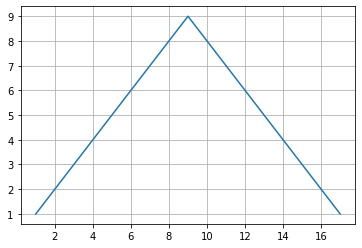

In [56]:
# 빈 캔버스를 초기화한다.
plt.figure()

x = np.arange(1,18,1)
y = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1]

# 그래프를 메모리상에서 그리고
plt.plot(x,y)
plt.grid()
# 그래프를 출력한다.
plt.show()

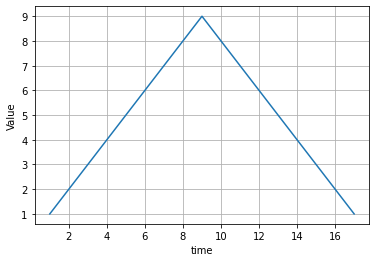

In [57]:
# 빈 캔버스를 초기화한다.
plt.figure()

x = np.arange(1,18,1)
y = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1]

# 그래프를 메모리상에서 그리고
plt.plot(x,y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Value')
# 그래프를 출력한다.
plt.show()

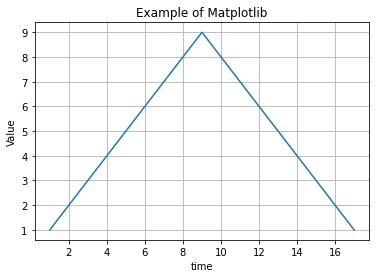

In [58]:
# 빈 캔버스를 초기화한다.
plt.figure()

x = np.arange(1,18,1)
y = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1]

# 그래프를 메모리상에서 그리고
plt.plot(x,y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Value')
plt.title('Example of Matplotlib')
# 그래프를 출력한다.
plt.show()

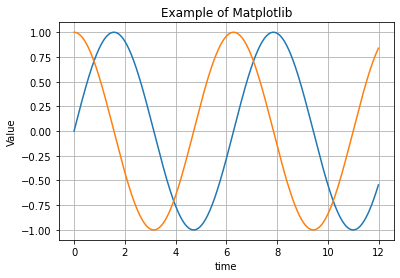

In [59]:
# 하나의 그래프에 2개를 그리기
plt.figure()

t = np.arange(0,12,0.01)
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Value')
plt.title('Example of Matplotlib')
plt.show()

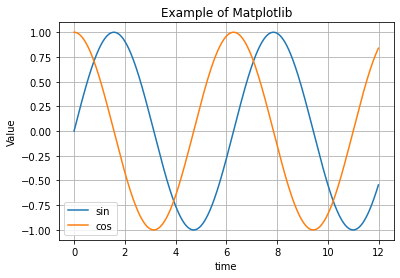

In [61]:
# legend추가하기
plt.figure()

t = np.arange(0,12,0.01)
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Value')
plt.title('Example of Matplotlib')
plt.show()

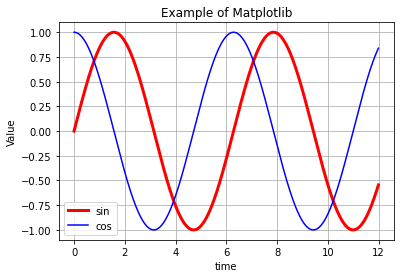

In [62]:
# 그래프 색상, 선두께 지정하기
plt.figure()

t = np.arange(0,12,0.01)
plt.plot(t, np.sin(t), 'r', lw=3, label='sin')
plt.plot(t, np.cos(t), 'b', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Value')
plt.title('Example of Matplotlib')
plt.show()

아래 링크의 wikidocs를 참조하세요.
https://wikidocs.net/137791

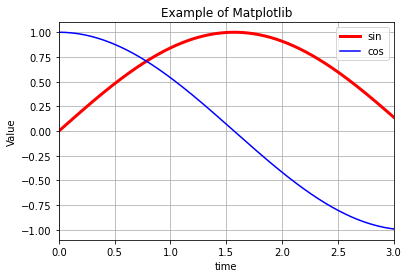

In [63]:
# 그래프의 특정부분만 그래프로 출력하기
plt.figure()

t = np.arange(0,12,0.01)
plt.plot(t, np.sin(t), 'r', lw=3, label='sin')
plt.plot(t, np.cos(t), 'b', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Value')
plt.xlim(0,3)
plt.ylim(-1.1, 1.1)
plt.title('Example of Matplotlib')
plt.show()

In [64]:
x=np.array([0,1,2,3,4,5,6,7,8,9])
y=np.array([9,8,7,6,5,4,3,2,1,0])

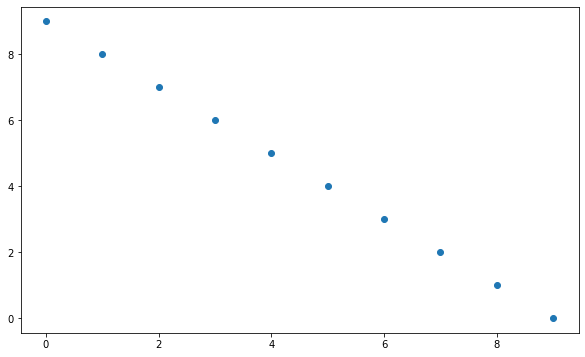

In [65]:
# scatter함수로 그리기
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.show()

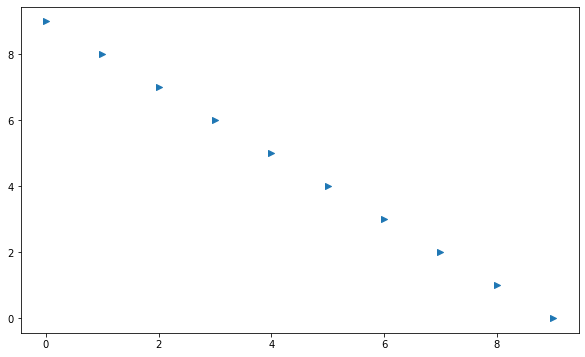

In [66]:
# scatter함수로 그리기, marker의 모양 변경하기
plt.figure(figsize=(10,6))
plt.scatter(x,y, marker='>')
plt.show()

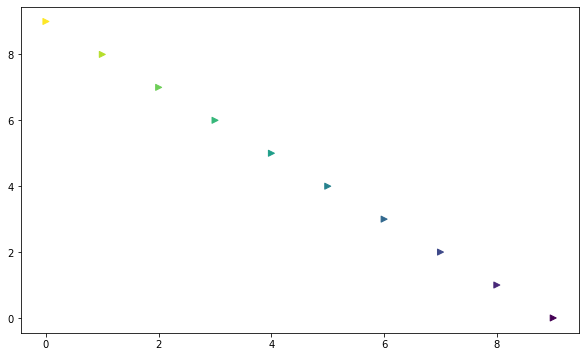

In [67]:
# scatter함수로 그리기, marker의 모양 변경하기
plt.figure(figsize=(10,6))
plt.scatter(x,y, marker='>', c = y)
plt.show()

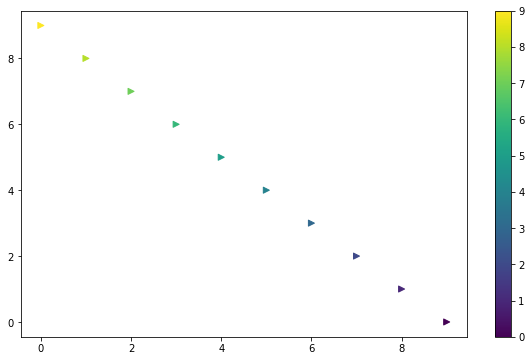

In [68]:
# scatter함수로 그리기, marker의 모양 변경하기
plt.figure(figsize=(10,6))
plt.scatter(x,y, marker='>', c = y)
plt.colorbar()
plt.show()

런타임 다시 시작

In [69]:
import matplotlib.pyplot as plt
# matplotlib에 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [70]:
plt
data_result

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


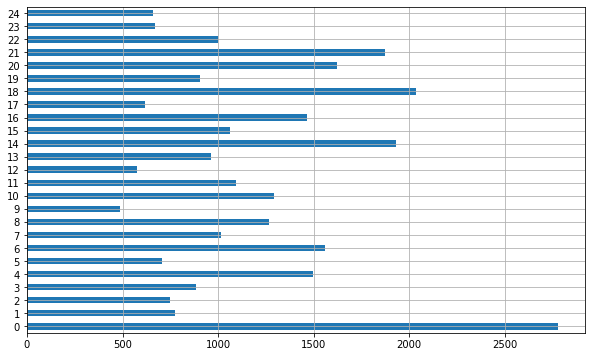

In [71]:
plt.figure(figsize=(10,6))
data_result['소계'].plot(kind='barh', grid=True)
plt.show()

In [72]:
data_result.set_index(keys=['구별'], inplace=True)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49569 missing from current font.
  font.set_

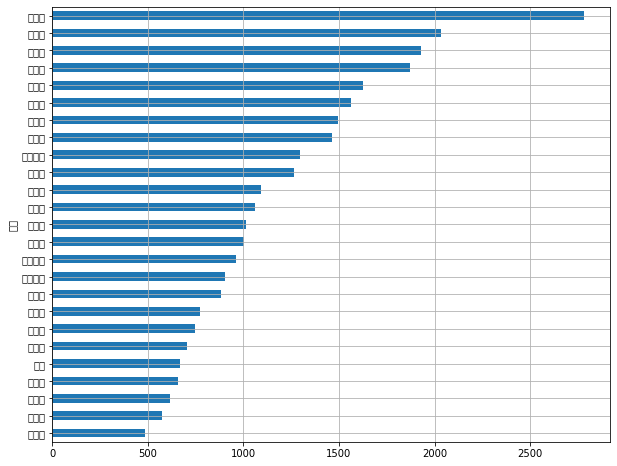

In [73]:
plt.figure(figsize=(10,8))
data_result['소계'].sort_values().plot(kind='barh', grid=True)
plt.show()

In [74]:
data_result

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_

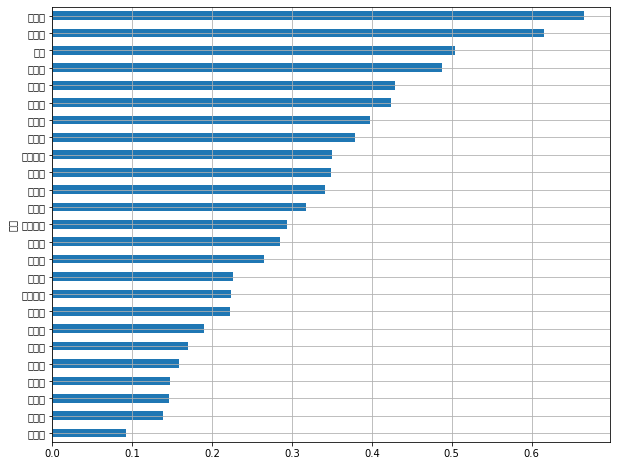

In [76]:
data_result['CCTV비율']=data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,8))
plt.show()

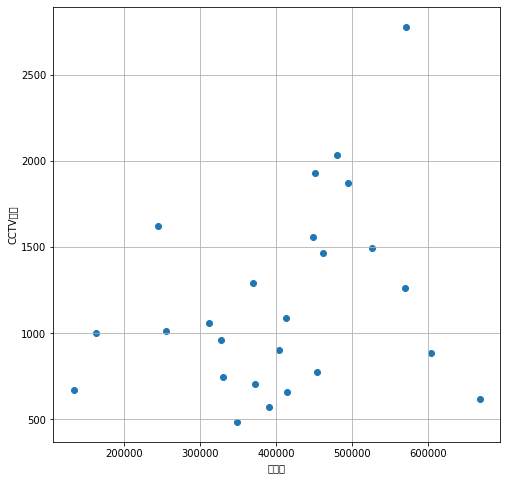

In [78]:
plt.figure(figsize=(8,8))
plt.scatter(data_result['인구수'],data_result['소계'])
plt.xlabel('인구수')
plt.ylabel('CCTV대수')
plt.grid()
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_te

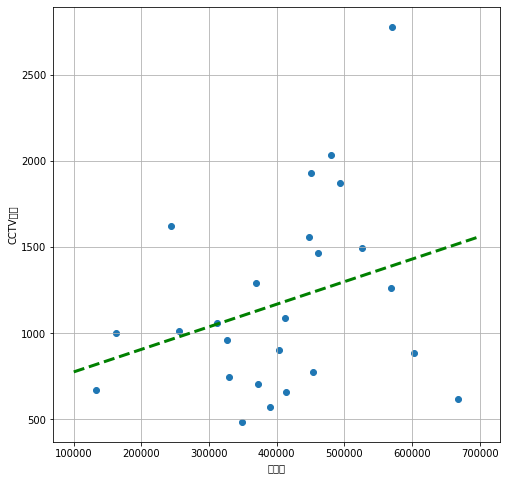

In [80]:
# numpy의 polyfit
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)
f1=np.poly1d(fp1)
fx=np.linspace(100000, 700000, 100)

plt.figure(figsize=(8,8))
plt.scatter(data_result['인구수'],data_result['소계'])
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV대수')
plt.grid()
plt.show()

In [81]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690
도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.139110,616.501341
마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110,0.147312,581.180999
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,0.378852,580.698457
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_

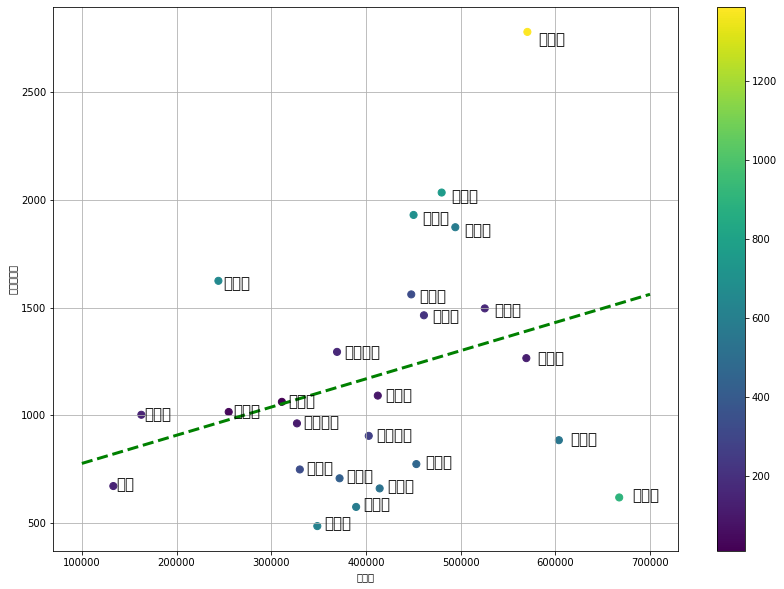

In [82]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()